# Fourth-order tensors

In this notebook, we will show various representations of fourth-order tensors and conversion between them.

Various representation of fourth-order tensors are implemented in the `tensorconvert.FourthOrderTensor` class.

In [2]:
import sympy
from tensorconvert import SecondOrderTensor, FourthOrderTensor

sympy.init_printing(use_latex="mathjax")

## Representations

By default, `FourthOrderTensor` is initialized with a generic fourth-order array `ArraySymbol`.

The spatial dimension is indicated by the `dim` parameter. By default, we have `dim = 3`.

The symmetry of the array object can be prescribed through the `symmetry` parameter

- No symmetry `symmetry=None`
- Minor symmetry `symmetry="minor"`, which implies `a[i, j, k, l] = a[j, i, k, l] = a[i, j, l, k]`. In practice, the expressions containing `a[j, i, k, l]` and `a[i, j, l, k]` with `j > i` and `l > k` will be replaced by `a[i, j, l, k]`.
- (Default) Major symmetry `symmetry="major"`, which additionally assumes that `a[i, j, k, l] = a[k, l, i, j]`. In practice, this implies that the matrix representation will be symmetric using the upper-diagonal part.

Fourth-order tensors are regarded as a linear operator $T$ in the vector space $V$ of second-order tensors

$$
    T:V\to V.
$$

The dimension of the vector space $V$ is not to be confused with the spatial dimension. For 3-d symmetric second-order tensors, the dimension of $V$ is 6, since 6 basis vectors are required to represent them using for example Voigt or Mandel notation.

After having chosen a basis for the input and the output spaces $V$ (which can be the same), the fourth-order tensor $\mathbb{C}$ can be represented by a matrix

$$
T(\mathbf{v}_j)=\sum_{i=1}^n T_{ij}\mathbf{w}_i\quad\implies T=\begin{bmatrix}
T_{11} & T_{12} & \ldots & T_{1n} \\
T_{21} & T_{22} & \ldots & T_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
T_{n1} & T_{n2} & \ldots & T_{nn} \\
\end{bmatrix}.
$$

Here, $(\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_n)$ is the basis chosen to represent input second-order tensors, while $(\mathbf{w}_1, \mathbf{w}_2, \ldots, \mathbf{w}_n)$ is used to represent output second-order tensors.

### Voigt notation

Voigt notation assumes that the input is a strain-like tensor while the output is stress-like. Hence

- Input basis $\mathbf{v}$ is `SecondOrderTensor().basis_voigt_strain()`.
- Output basis $\mathbf{w}$ is `SecondOrderTensor().basis_voigt_stress()`.

In [2]:
FourthOrderTensor().as_voigt()

⎡a[0, 0, 0, 0]  a[0, 0, 1, 1]  a[0, 0, 2, 2]  a[0, 0, 0, 1]  a[0, 0, 0, 2]  a[
⎢                                                                             
⎢a[0, 0, 1, 1]  a[1, 1, 1, 1]  a[1, 1, 2, 2]  a[1, 1, 0, 1]  a[1, 1, 0, 2]  a[
⎢                                                                             
⎢a[0, 0, 2, 2]  a[1, 1, 2, 2]  a[2, 2, 2, 2]  a[2, 2, 0, 1]  a[2, 2, 0, 2]  a[
⎢                                                                             
⎢a[0, 0, 0, 1]  a[1, 1, 0, 1]  a[2, 2, 0, 1]  a[0, 1, 0, 1]  a[0, 1, 0, 2]  a[
⎢                                                                             
⎢a[0, 0, 0, 2]  a[1, 1, 0, 2]  a[2, 2, 0, 2]  a[0, 1, 0, 2]  a[0, 2, 0, 2]  a[
⎢                                                                             
⎣a[0, 0, 1, 2]  a[1, 1, 1, 2]  a[2, 2, 1, 2]  a[0, 1, 1, 2]  a[0, 2, 1, 2]  a[

0, 0, 1, 2]⎤
           ⎥
1, 1, 1, 2]⎥
           ⎥
2, 2, 1, 2]⎥
           ⎥
0, 1, 1, 2]⎥
           ⎥
0, 2, 1, 2]⎥
           ⎥


The ordering of the shear (off-diagonal) components can also be specified by the `ordering` parameter. By default, we assume `FourthOrderTensor(ordering="121323")` as for second-order tensors.

In [3]:
FourthOrderTensor(ordering="122313").as_voigt()

⎡a[0, 0, 0, 0]  a[0, 0, 1, 1]  a[0, 0, 2, 2]  a[0, 0, 0, 1]  a[0, 0, 1, 2]  a[
⎢                                                                             
⎢a[0, 0, 1, 1]  a[1, 1, 1, 1]  a[1, 1, 2, 2]  a[1, 1, 0, 1]  a[1, 1, 1, 2]  a[
⎢                                                                             
⎢a[0, 0, 2, 2]  a[1, 1, 2, 2]  a[2, 2, 2, 2]  a[2, 2, 0, 1]  a[2, 2, 1, 2]  a[
⎢                                                                             
⎢a[0, 0, 0, 1]  a[1, 1, 0, 1]  a[2, 2, 0, 1]  a[0, 1, 0, 1]  a[0, 1, 1, 2]  a[
⎢                                                                             
⎢a[0, 0, 1, 2]  a[1, 1, 1, 2]  a[2, 2, 1, 2]  a[0, 1, 1, 2]  a[1, 2, 1, 2]  a[
⎢                                                                             
⎣a[0, 0, 0, 2]  a[1, 1, 0, 2]  a[2, 2, 0, 2]  a[0, 1, 0, 2]  a[1, 2, 0, 2]  a[

0, 0, 0, 2]⎤
           ⎥
1, 1, 0, 2]⎥
           ⎥
2, 2, 0, 2]⎥
           ⎥
0, 1, 0, 2]⎥
           ⎥
1, 2, 0, 2]⎥
           ⎥


It can be observed that by default, the matrix representation is symmetric, due to major symmetry. With `symmetry = "minor"`, the output matrix is no longer symmetric.

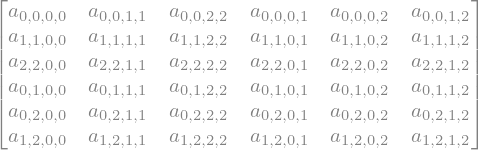

In [5]:
FourthOrderTensor(symmetry="minor").as_voigt()

### Mandel notation

Mandel notation uses the same basis vectors to represent the input and the output second-order tensors. Hence

- Input basis $\mathbf{v}$ is `SecondOrderTensor().basis_mandel()`.
- Output basis $\mathbf{w}$ is `SecondOrderTensor().basis_mandel()`.

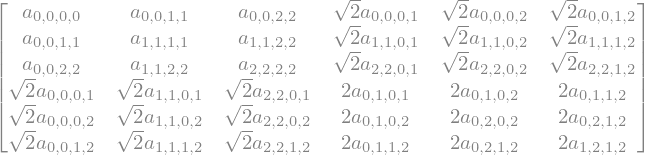

In [9]:
FourthOrderTensor().as_mandel()

The spatial dimension can be specified by the `dim` parameter.

In [5]:
FourthOrderTensor(dim=2, symmetry="minor").as_mandel()

⎡ a[0, 0, 0, 0]     a[0, 0, 1, 1]    √2⋅a[0, 0, 0, 1]⎤
⎢                                                    ⎥
⎢ a[1, 1, 0, 0]     a[1, 1, 1, 1]    √2⋅a[1, 1, 0, 1]⎥
⎢                                                    ⎥
⎣√2⋅a[0, 1, 0, 0]  √2⋅a[0, 1, 1, 1]  2⋅a[0, 1, 0, 1] ⎦

### Unsymmetric notation

For fourth-order tensors without any symmetry (which means the input and the output tensors are not symmetric), the unsymmetric notation can be used

- Input basis $\mathbf{v}$ is `SecondOrderTensor().basis_unsym()`.
- Output basis $\mathbf{w}$ is `SecondOrderTensor().basis_unsym()`.

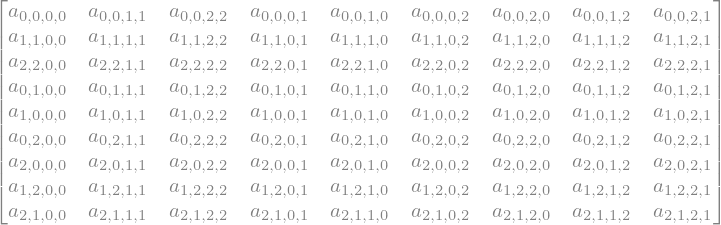

In [3]:
FourthOrderTensor(symmetry=None).as_unsym()

In [6]:
FourthOrderTensor(dim=2, symmetry=None).as_unsym()

⎡a[0, 0, 0, 0]  a[0, 0, 1, 1]  a[0, 0, 0, 1]  a[0, 0, 1, 0]⎤
⎢                                                          ⎥
⎢a[1, 1, 0, 0]  a[1, 1, 1, 1]  a[1, 1, 0, 1]  a[1, 1, 1, 0]⎥
⎢                                                          ⎥
⎢a[0, 1, 0, 0]  a[0, 1, 1, 1]  a[0, 1, 0, 1]  a[0, 1, 1, 0]⎥
⎢                                                          ⎥
⎣a[1, 0, 0, 0]  a[1, 0, 1, 1]  a[1, 0, 0, 1]  a[1, 0, 1, 0]⎦

### Array

The underlying fourth-order array can also be shown via the `as_array` method.

In [7]:
FourthOrderTensor(dim=2).as_array()

a

By default, it is a `ArraySymbol` object. Its components can be shown via the `as_explicit` method.

In [8]:
FourthOrderTensor(dim=2).as_array().as_explicit()

⎡⎡a[0, 0, 0, 0]  a[0, 0, 0, 1]⎤  ⎡a[0, 1, 0, 0]  a[0, 1, 0, 1]⎤⎤
⎢⎢                            ⎥  ⎢                            ⎥⎥
⎢⎣a[0, 0, 1, 0]  a[0, 0, 1, 1]⎦  ⎣a[0, 1, 1, 0]  a[0, 1, 1, 1]⎦⎥
⎢                                                              ⎥
⎢⎡a[1, 0, 0, 0]  a[1, 0, 0, 1]⎤  ⎡a[1, 1, 0, 0]  a[1, 1, 0, 1]⎤⎥
⎢⎢                            ⎥  ⎢                            ⎥⎥
⎣⎣a[1, 0, 1, 0]  a[1, 0, 1, 1]⎦  ⎣a[1, 1, 1, 0]  a[1, 1, 1, 1]⎦⎦

## Initialization by matrix representations

The default constructor of `FourthOrderTensor` uses a generic tensor object. It can also be initialized from the previous matrix representations.

In [34]:
dim = 3
n = 6 if dim == 3 else 3  # symmetric second-order tensors
a_mandel = sympy.randMatrix(n, n)
a_mandel += a_mandel.T
a_mandel  # Mandel representation of the tensor

⎡170  121  50   99   150  102⎤
⎢                            ⎥
⎢121  40   136  175  141  107⎥
⎢                            ⎥
⎢50   136  148  118  114  123⎥
⎢                            ⎥
⎢99   175  118  110  104  164⎥
⎢                            ⎥
⎢150  141  114  104  122  136⎥
⎢                            ⎥
⎣102  107  123  164  136  148⎦

In [35]:
a = FourthOrderTensor(dim).from_mandel(a_mandel)  # initialize from Mandel notation

In [37]:
a.as_voigt()  # now, represent as Voigt notation

⎡                       99⋅√2                 ⎤
⎢ 170    121      50    ─────   75⋅√2   51⋅√2 ⎥
⎢                         2                   ⎥
⎢                                             ⎥
⎢                       175⋅√2  141⋅√2  107⋅√2⎥
⎢ 121     40     136    ──────  ──────  ──────⎥
⎢                         2       2       2   ⎥
⎢                                             ⎥
⎢                                       123⋅√2⎥
⎢ 50     136     148    59⋅√2   57⋅√2   ──────⎥
⎢                                         2   ⎥
⎢                                             ⎥
⎢99⋅√2  175⋅√2                                ⎥
⎢─────  ──────  59⋅√2     55      52      82  ⎥
⎢  2      2                                   ⎥
⎢                                             ⎥
⎢       141⋅√2                                ⎥
⎢75⋅√2  ──────  57⋅√2     52      61      68  ⎥
⎢         2                                   ⎥
⎢                                             ⎥
⎢       107⋅√2  123⋅√2                  

Now, we initialize from this Voigt notation and then represent as Mandel notation. We should recover the initial matrix.

Thanks to the [Fluent API](https://en.wikipedia.org/wiki/Fluent_interface#Python), `as_mandel` can be applied directly after `from_voigt`.

In [38]:
FourthOrderTensor(dim).from_voigt(a.as_voigt()).as_mandel()

⎡170  121  50   99   150  102⎤
⎢                            ⎥
⎢121  40   136  175  141  107⎥
⎢                            ⎥
⎢50   136  148  118  114  123⎥
⎢                            ⎥
⎢99   175  118  110  104  164⎥
⎢                            ⎥
⎢150  141  114  104  122  136⎥
⎢                            ⎥
⎣102  107  123  164  136  148⎦

In [39]:
FourthOrderTensor(dim).from_voigt(a.as_voigt()).as_mandel() == a_mandel

True

## Initialization by an operator

`FourthOrderTensor` can also be initialized from a linear operator $T:V\to V$ defining the fourth-order tensor. A Python function operating on `sympy.Matrix` is required.

### Identity

The identity map just return the input tensor as the output.

In [11]:
def identity(x):
    return x

Using Voigt notation, the matrix representation of the identity map is not identity!

In [12]:
FourthOrderTensor().from_operator(identity).as_voigt()

⎡1  0  0   0    0    0 ⎤
⎢                      ⎥
⎢0  1  0   0    0    0 ⎥
⎢                      ⎥
⎢0  0  1   0    0    0 ⎥
⎢                      ⎥
⎢0  0  0  1/2   0    0 ⎥
⎢                      ⎥
⎢0  0  0   0   1/2   0 ⎥
⎢                      ⎥
⎣0  0  0   0    0   1/2⎦

By comparison, with Mandel notation the matrix identity is well obtained.

In [10]:
FourthOrderTensor(dim=2).from_operator(identity).as_mandel()

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

### Deviatoric operator

The deviatoric operator computes the trace-free part of a second-order tensor. The trace of the output is zero.

In [13]:
def dev(eps):
    dim = eps.shape[0]
    tr = sympy.trace(eps)
    return eps - tr / dim * sympy.eye(dim)

In [14]:
FourthOrderTensor().from_operator(dev).as_mandel()

⎡2/3   -1/3  -1/3  0  0  0⎤
⎢                         ⎥
⎢-1/3  2/3   -1/3  0  0  0⎥
⎢                         ⎥
⎢-1/3  -1/3  2/3   0  0  0⎥
⎢                         ⎥
⎢ 0     0     0    1  0  0⎥
⎢                         ⎥
⎢ 0     0     0    0  1  0⎥
⎢                         ⎥
⎣ 0     0     0    0  0  1⎦

In [15]:
FourthOrderTensor(dim=2).from_operator(dev).as_voigt()

⎡1/2   -1/2   0 ⎤
⎢               ⎥
⎢-1/2  1/2    0 ⎥
⎢               ⎥
⎣ 0     0    1/2⎦

### Isotropic linear elasticity

The fourth-order isotropic linear elastic stiffness tensor can be defined using two Lamé constants $\lambda$ and $\mu$

$$
\bm{\sigma}=\mathbb{C}\bm{\varepsilon}=\lambda\cdot\mathrm{tr}(\bm{\varepsilon})\cdot\mathbb{I}_d+2\mu\bm{\varepsilon}
$$

In [1]:
def linear_elastic(eps):
    dim = eps.shape[0]
    lmbda, mu = sympy.symbols("lambda, mu", positive=True)
    return lmbda * sympy.trace(eps) * sympy.eye(dim) + 2 * mu * eps

In [17]:
FourthOrderTensor().from_operator(linear_elastic).as_mandel()

⎡λ + 2⋅μ     λ        λ      0    0    0 ⎤
⎢                                        ⎥
⎢   λ     λ + 2⋅μ     λ      0    0    0 ⎥
⎢                                        ⎥
⎢   λ        λ     λ + 2⋅μ   0    0    0 ⎥
⎢                                        ⎥
⎢   0        0        0     2⋅μ   0    0 ⎥
⎢                                        ⎥
⎢   0        0        0      0   2⋅μ   0 ⎥
⎢                                        ⎥
⎣   0        0        0      0    0   2⋅μ⎦

In [20]:
FourthOrderTensor(dim=2).from_operator(linear_elastic).as_voigt()

⎡λ + 2⋅μ     λ     0⎤
⎢                   ⎥
⎢   λ     λ + 2⋅μ  0⎥
⎢                   ⎥
⎣   0        0     μ⎦

We can verify that the tensor intialized from Mandel representation provided by `as_mandel` and then converted to Voigt notation is the same as that directly initialized from the operator. 

In [40]:
C = FourthOrderTensor().from_operator(linear_elastic)

FourthOrderTensor().from_mandel(C.as_mandel()).as_voigt() == C.as_voigt()

True

The same applies for Voigt notation.

In [41]:
FourthOrderTensor().from_voigt(C.as_voigt()).as_mandel() == C.as_mandel()

True

Conversion between array and the Voigt / Mandel / unsymmetric notations also works.

In [42]:
a_voigt = sympy.randMatrix(6)
a_voigt = a_voigt + a_voigt.T
a = FourthOrderTensor().from_voigt(a_voigt).as_array()
FourthOrderTensor().from_array(a).as_voigt() == a_voigt

True

In [43]:
a_mandel = sympy.randMatrix(6)
a_mandel = a_mandel + a_mandel.T
a = FourthOrderTensor().from_mandel(a_mandel).as_array()
FourthOrderTensor().from_array(a).as_mandel() == a_mandel

True

In [44]:
a_unsym = sympy.randMatrix(9)
a = FourthOrderTensor(symmetry=None).from_unsym(a_unsym).as_array()
FourthOrderTensor(symmetry=None).from_array(a).as_unsym() == a_unsym

True

### Change of basis for second-order tensors

A change of basis in $\mathbb{R}^d$ ($d$ is the spatial dimension `dim`) can be represented by an unsymmetric matrix $\mathbf{R}$ whose columns contain the components of the new basis vectors in the old ones. For a second-order tensor $\sigma$ written as matrices, its representation in the new basis will be given by

$$
\bm{\sigma}'=\mathbf{R}^\mathsf{T}\bm{\sigma}\mathbf{R}.
$$

The change of basis $\bm{\sigma}\mapsto\bm{\sigma}'$ can be regarded as a fourth-order tensor operating on second-order ones.

In [24]:
def rotation(x):
    r = sympy.MatrixSymbol("R", x.shape[0], x.shape[0])  # generic unsymmetric matrix
    return r.T * x * r

For symmetric second-order tensors, Mandel notation can be used.

In [23]:
FourthOrderTensor().from_operator(rotation).as_mandel()

⎡      2           2           2                                              
⎢   R₀₀         R₁₀         R₂₀         √2⋅R₀₀⋅R₁₀         √2⋅R₀₀⋅R₂₀         
⎢                                                                             
⎢      2           2           2                                              
⎢   R₀₁         R₁₁         R₂₁         √2⋅R₀₁⋅R₁₁         √2⋅R₀₁⋅R₂₁         
⎢                                                                             
⎢      2           2           2                                              
⎢   R₀₂         R₁₂         R₂₂         √2⋅R₀₂⋅R₁₂         √2⋅R₀₂⋅R₂₂         
⎢                                                                             
⎢√2⋅R₀₀⋅R₀₁  √2⋅R₁₀⋅R₁₁  √2⋅R₂₀⋅R₂₁  R₀₀⋅R₁₁ + R₀₁⋅R₁₀  R₀₀⋅R₂₁ + R₀₁⋅R₂₀  R₁₀
⎢                                                                             
⎢√2⋅R₀₀⋅R₀₂  √2⋅R₁₀⋅R₁₂  √2⋅R₂₀⋅R₂₂  R₀₀⋅R₁₂ + R₀₂⋅R₁₀  R₀₀⋅R₂₂ + R₀₂⋅R₂₀  R₁₀
⎢                                                   

For unsymmetric second-order tensors, the unsymmetric representation can be used.

In [30]:
FourthOrderTensor().from_operator(rotation).as_unsym()

⎡    2        2        2                                                      
⎢ R₀₀      R₁₀      R₂₀     R₀₀⋅R₁₀  R₀₀⋅R₁₀  R₀₀⋅R₂₀  R₀₀⋅R₂₀  R₁₀⋅R₂₀  R₁₀⋅R
⎢                                                                             
⎢    2        2        2                                                      
⎢ R₀₁      R₁₁      R₂₁     R₀₁⋅R₁₁  R₀₁⋅R₁₁  R₀₁⋅R₂₁  R₀₁⋅R₂₁  R₁₁⋅R₂₁  R₁₁⋅R
⎢                                                                             
⎢    2        2        2                                                      
⎢ R₀₂      R₁₂      R₂₂     R₀₂⋅R₁₂  R₀₂⋅R₁₂  R₀₂⋅R₂₂  R₀₂⋅R₂₂  R₁₂⋅R₂₂  R₁₂⋅R
⎢                                                                             
⎢R₀₀⋅R₀₁  R₁₀⋅R₁₁  R₂₀⋅R₂₁  R₀₀⋅R₁₁  R₀₁⋅R₁₀  R₀₀⋅R₂₁  R₀₁⋅R₂₀  R₁₀⋅R₂₁  R₁₁⋅R
⎢                                                                             
⎢R₀₀⋅R₀₁  R₁₀⋅R₁₁  R₂₀⋅R₂₁  R₀₁⋅R₁₀  R₀₀⋅R₁₁  R₀₁⋅R₂₀  R₀₀⋅R₂₁  R₁₁⋅R₂₀  R₁₀⋅R
⎢                                                   

In 2-d, the rotation matrix can also be directly expressed by the `theta` variable.

In [32]:
def rotation(x):
    assert x.shape[0] == 2
    theta = sympy.symbols("theta")
    sin = sympy.sin(theta)
    cos = sympy.cos(theta)
    r = sympy.Matrix([[cos, -sin], [sin, cos]])
    return r.T * x * r


sympy.expand_trig(FourthOrderTensor(dim=2).from_operator(rotation).as_mandel())

⎡        2                 2                           ⎤
⎢     cos (θ)           sin (θ)       √2⋅sin(θ)⋅cos(θ) ⎥
⎢                                                      ⎥
⎢        2                 2                           ⎥
⎢     sin (θ)           cos (θ)       -√2⋅sin(θ)⋅cos(θ)⎥
⎢                                                      ⎥
⎢                                            2         ⎥
⎣-√2⋅sin(θ)⋅cos(θ)  √2⋅sin(θ)⋅cos(θ)    2⋅cos (θ) - 1  ⎦

### Acoustic tensor

Given a unit vector $\mathbf{n}$ in $\mathbb{R}^d$ and the fourth-order stiffness tensor $\mathbb{C}$, the following second-order acoustic tensor $\mathbf{A}$ can be defined

$$
A_{ik}=\sum_{j=1}^d\sum_{l=1}^d n_j\cdot C_{ijkl}\cdot n_l.
$$

This acoustic tensor can also be regarded as the output of a fourth-order tensor $\mathbb{A}$ operating on the second-order tensor $\mathbf{n}\otimes\mathbf{n}$.

$$
\mathbb{A}:\mathbf{n}\otimes\mathbf{n}\mapsto \mathbf{A},\quad A_{ik}=\sum_{j=1}^d\sum_{l=1}^d C_{ijkl}\cdot n_jn_l.
$$

Assume that the stiffness tensor has major symmetry (for instance, under linear elasticity). It can thus be represented by Mandel notation.

In [47]:
C = sympy.Matrix(sympy.MatrixSymbol("C", 6, 6))
for i in range(C.shape[0]):
    for j in range(i):
        C[i, j] = C[j, i]
C = FourthOrderTensor().from_mandel(C)
C.as_mandel()

⎡C₀₀  C₀₁  C₀₂  C₀₃  C₀₄  C₀₅⎤
⎢                            ⎥
⎢C₀₁  C₁₁  C₁₂  C₁₃  C₁₄  C₁₅⎥
⎢                            ⎥
⎢C₀₂  C₁₂  C₂₂  C₂₃  C₂₄  C₂₅⎥
⎢                            ⎥
⎢C₀₃  C₁₃  C₂₃  C₃₃  C₃₄  C₃₅⎥
⎢                            ⎥
⎢C₀₄  C₁₄  C₂₄  C₃₄  C₄₄  C₄₅⎥
⎢                            ⎥
⎣C₀₅  C₁₅  C₂₅  C₃₅  C₄₅  C₅₅⎦

The fourth-order tensor $\mathbb{A}$ can be defined as follows.

In [48]:
def acoustic_tensor(n_n):
    C_array = C.as_array()
    dim = 3
    A = sympy.zeros(dim)
    for i in range(dim):
        for k in range(dim):
            for j in range(dim):
                for l in range(dim):
                    A[i, k] += C_array[i, j, k, l] * n_n[j, l]
    return A

Its Mandel representation can be computed easily via `as_mandel`.

In [50]:
A = FourthOrderTensor().from_operator(acoustic_tensor)
A.as_mandel()

⎡         C₃₃     C₄₄                                   √2⋅C₃₄   ⎤
⎢ C₀₀     ───     ───        C₀₃           C₀₄          ──────   ⎥
⎢          2       2                                      2      ⎥
⎢                                                                ⎥
⎢ C₃₃             C₅₅                     √2⋅C₃₅                 ⎥
⎢ ───     C₁₁     ───        C₁₃          ──────         C₁₅     ⎥
⎢  2               2                        2                    ⎥
⎢                                                                ⎥
⎢ C₄₄     C₅₅               √2⋅C₄₅                               ⎥
⎢ ───     ───     C₂₂       ──────         C₂₄           C₂₅     ⎥
⎢  2       2                  2                                  ⎥
⎢                                                                ⎥
⎢                √2⋅C₄₅         C₃₃    √2⋅C₀₅   C₃₄  √2⋅C₁₄   C₃₅⎥
⎢ C₀₃     C₁₃    ──────   C₀₁ + ───    ────── + ───  ────── + ───⎥
⎢                  2             2       2       2     2      

To compute the actual acoustic tensor, we need to define the second-order tensor $\mathbf{n}\otimes\mathbf{n}$ as the outer product of $\mathbf{n}$.

In [7]:
n = sympy.IndexedBase("n")
n = sympy.Matrix([n[i] for i in range(3)])
n_n = n * n.T
n_n = SecondOrderTensor().from_array(n_n)
n_n.as_mandel()

⎡       2    ⎤
⎢   n[0]     ⎥
⎢            ⎥
⎢       2    ⎥
⎢   n[1]     ⎥
⎢            ⎥
⎢       2    ⎥
⎢   n[2]     ⎥
⎢            ⎥
⎢√2⋅n[0]⋅n[1]⎥
⎢            ⎥
⎢√2⋅n[0]⋅n[2]⎥
⎢            ⎥
⎣√2⋅n[1]⋅n[2]⎦

The acoustic tensor can be obtained by performing matrix-vector multiplication between the Mandel representation of $\mathbb{A}$ and that of $\mathbf{n}\otimes\mathbf{n}$.

In [52]:
sympy.simplify(A.as_mandel() * n_n.as_mandel())

⎡                                                                         2   
⎢                       2                                             n[1] ⋅C₃
⎢                   n[0] ⋅C₀₀ + √2⋅n[0]⋅n[1]⋅C₀₃ + √2⋅n[0]⋅n[2]⋅C₀₄ + ────────
⎢                                                                         2   
⎢                                                                             
⎢                       2                                                     
⎢                   n[0] ⋅C₃₃                                          2      
⎢                   ───────── + √2⋅n[0]⋅n[1]⋅C₁₃ + n[0]⋅n[2]⋅C₃₅ + n[1] ⋅C₁₁ +
⎢                       2                                                     
⎢                                                                             
⎢                       2                                              2      
⎢                   n[0] ⋅C₄₄                                      n[1] ⋅C₅₅  
⎢                   ───────── + n[0]⋅n[1]⋅C₄₅ + √2⋅n

In the isotropic case, the previous `linear_elastic` operator can be used.

In [4]:
def acoustic_tensor_isotropic(n_n):
    C_array = FourthOrderTensor().from_operator(linear_elastic).as_array()
    dim = 3
    A = sympy.zeros(dim)
    for i in range(dim):
        for k in range(dim):
            for j in range(dim):
                for l in range(dim):
                    A[i, k] += C_array[i, j, k, l] * n_n[j, l]
    return A

In [5]:
A = FourthOrderTensor().from_operator(acoustic_tensor_isotropic)
A.as_mandel()

⎡λ + 2⋅μ     μ        μ       0      0      0  ⎤
⎢                                              ⎥
⎢   μ     λ + 2⋅μ     μ       0      0      0  ⎥
⎢                                              ⎥
⎢   μ        μ     λ + 2⋅μ    0      0      0  ⎥
⎢                                              ⎥
⎢   0        0        0     λ + μ    0      0  ⎥
⎢                                              ⎥
⎢   0        0        0       0    λ + μ    0  ⎥
⎢                                              ⎥
⎣   0        0        0       0      0    λ + μ⎦

In [8]:
sympy.simplify(A.as_mandel() * n_n.as_mandel())

⎡      2         2                 2⎤
⎢μ⋅n[1]  + μ⋅n[2]  + (λ + 2⋅μ)⋅n[0] ⎥
⎢                                   ⎥
⎢      2         2                 2⎥
⎢μ⋅n[0]  + μ⋅n[2]  + (λ + 2⋅μ)⋅n[1] ⎥
⎢                                   ⎥
⎢      2         2                 2⎥
⎢μ⋅n[0]  + μ⋅n[1]  + (λ + 2⋅μ)⋅n[2] ⎥
⎢                                   ⎥
⎢       √2⋅(λ + μ)⋅n[0]⋅n[1]        ⎥
⎢                                   ⎥
⎢       √2⋅(λ + μ)⋅n[0]⋅n[2]        ⎥
⎢                                   ⎥
⎣       √2⋅(λ + μ)⋅n[1]⋅n[2]        ⎦

The same procedure can be repeated for unsymmetric stiffness tensors, for instance for finite-strain applications.

In [46]:
C = sympy.Matrix(sympy.MatrixSymbol("C", 9, 9))
C = FourthOrderTensor().from_unsym(C)


def acoustic_tensor(n_n):
    C_array = C.as_array()
    dim = 3
    A = sympy.zeros(dim)
    for i in range(dim):
        for k in range(dim):
            for j in range(dim):
                for l in range(dim):
                    A[i, k] += C_array[i, j, k, l] * n_n[j, l]
    return A

In [47]:
A = FourthOrderTensor().from_operator(acoustic_tensor)
A.as_unsym()

⎡C₀₀  C₃₃  C₅₅  C₀₃  C₃₀  C₀₅  C₅₀  C₃₅  C₅₃⎤
⎢                                           ⎥
⎢C₄₄  C₁₁  C₇₇  C₄₁  C₁₄  C₄₇  C₇₄  C₁₇  C₇₁⎥
⎢                                           ⎥
⎢C₆₆  C₈₈  C₂₂  C₆₈  C₈₆  C₆₂  C₂₆  C₈₂  C₂₈⎥
⎢                                           ⎥
⎢C₀₄  C₃₁  C₅₇  C₀₁  C₃₄  C₀₇  C₅₄  C₃₇  C₅₁⎥
⎢                                           ⎥
⎢C₄₀  C₁₃  C₇₅  C₄₃  C₁₀  C₄₅  C₇₀  C₁₅  C₇₃⎥
⎢                                           ⎥
⎢C₀₆  C₃₈  C₅₂  C₀₈  C₃₆  C₀₂  C₅₆  C₃₂  C₅₈⎥
⎢                                           ⎥
⎢C₆₀  C₈₃  C₂₅  C₆₃  C₈₀  C₆₅  C₂₀  C₈₅  C₂₃⎥
⎢                                           ⎥
⎢C₄₆  C₁₈  C₇₂  C₄₈  C₁₆  C₄₂  C₇₆  C₁₂  C₇₈⎥
⎢                                           ⎥
⎣C₆₄  C₈₁  C₂₇  C₆₁  C₈₄  C₆₇  C₂₄  C₈₇  C₂₁⎦

In [48]:
sympy.simplify(A.as_unsym() * n_n.as_unsym())

⎡    2                                                                        
⎢n[0] ⋅C₀₀ + n[0]⋅n[1]⋅C₀₃ + n[0]⋅n[1]⋅C₃₀ + n[0]⋅n[2]⋅C₀₅ + n[0]⋅n[2]⋅C₅₀ + n
⎢                                                                             
⎢    2                                                                        
⎢n[0] ⋅C₄₄ + n[0]⋅n[1]⋅C₁₄ + n[0]⋅n[1]⋅C₄₁ + n[0]⋅n[2]⋅C₄₇ + n[0]⋅n[2]⋅C₇₄ + n
⎢                                                                             
⎢    2                                                                        
⎢n[0] ⋅C₆₆ + n[0]⋅n[1]⋅C₆₈ + n[0]⋅n[1]⋅C₈₆ + n[0]⋅n[2]⋅C₂₆ + n[0]⋅n[2]⋅C₆₂ + n
⎢                                                                             
⎢    2                                                                        
⎢n[0] ⋅C₀₄ + n[0]⋅n[1]⋅C₀₁ + n[0]⋅n[1]⋅C₃₄ + n[0]⋅n[2]⋅C₀₇ + n[0]⋅n[2]⋅C₅₄ + n
⎢                                                                             
⎢    2                                              